<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

###
##### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [2]:
df = pd.read_csv("athlete_events.csv")

In [3]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


###

__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


- **ID:** Qualitativa nominal
- **Name:** Qualitativa nominal
- **Sex:** Qualitativa nominal
- **Age:** Quantitativa discreta
- **Height:** Quantitativa contínua
- **Weight:** Quantitativa contínua
- **Team:** Qualitativa nominal
- **NOC:** Qualitativa nominal
- **Games:** Qualitativa ordinal
- **Year:** Qualitativa ordinal
- **Season:** Qualitativa ordinal
- **City:** Qualitativa nominal
- **Sport:** Qualitativa nominal
- **Event:** Qualitativa nominal
- **Medal:** Qualitativa ordinal

###

__2) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros. Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória. Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros). Construa uma função que faça o papel da cdf() e outra função com o papel da sf(). Desafio extra: construir funções que fazem o papel da ppf() e da isf() .__'.f'.

In [4]:
distribuicao_frequencias = df["Age"].value_counts().sort_index()

print("Distribuição de frequências")
display(distribuicao_frequencias)

Distribuição de frequências


Age
10.0      1
11.0     13
12.0     39
13.0    187
14.0    837
       ... 
81.0      2
84.0      1
88.0      3
96.0      1
97.0      1
Name: count, Length: 74, dtype: int64

In [5]:
distribuicao_probabilidades = distribuicao_frequencias / distribuicao_frequencias.sum()

print("Distribuição de probabilidades")
display(distribuicao_probabilidades)

Distribuição de probabilidades


Age
10.0    0.000004
11.0    0.000050
12.0    0.000149
13.0    0.000715
14.0    0.003199
          ...   
81.0    0.000008
84.0    0.000004
88.0    0.000011
96.0    0.000004
97.0    0.000004
Name: count, Length: 74, dtype: float64

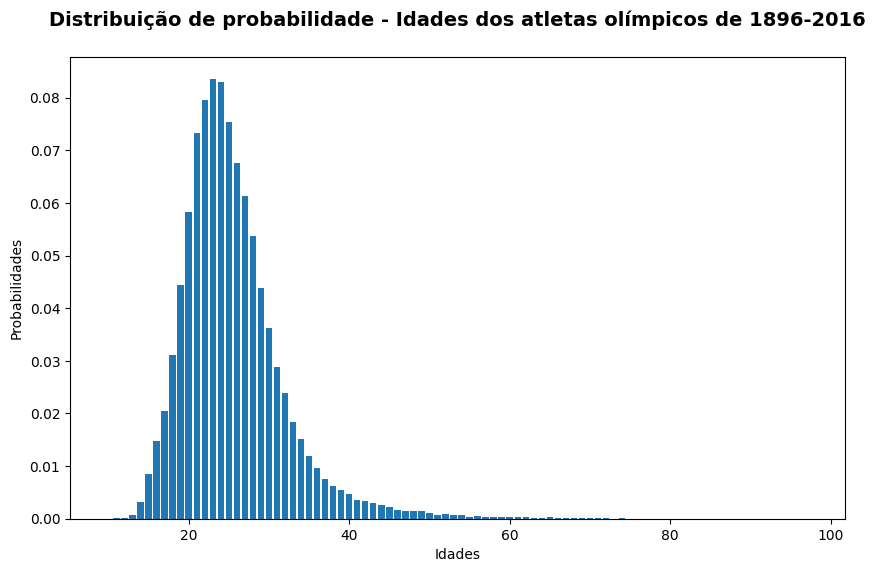

In [6]:
plt.figure(figsize=(10,6))
plt.bar(distribuicao_probabilidades.index, distribuicao_probabilidades.values)

plt.title('Distribuição de probabilidade - Idades dos atletas olímpicos de 1896-2016', fontweight=1000, fontsize=14, y=1.05)
plt.xlabel('Idades')
plt.ylabel('Probabilidades')

plt.show()

In [7]:
X = distribuicao_probabilidades.index
p = distribuicao_probabilidades.values

In [8]:
# funções esperança e variância
def esperanca(X, p):
    return sum(xi * pi for xi, pi in zip(X, p))
 
def variancia(X, p):
    return esperanca([xi ** 2 for xi in X], p) - esperanca(X, p) ** 2

# comparando resultados (funções esperança e variância x numpy)
print(f"""Comparando os resultados:

Esperança {esperanca(X, p)} (Python)
Variância {round(variancia(X, p), 2)} (Python)

Esperança {np.dot(X, p)} (NumPy)
Variância {np.round(np.dot(np.power(X, 2), p) - np.power(np.dot(X, p), 2), 2)} (NumPy)""")

Comparando os resultados:

Esperança 25.556898357297378 (Python)
Variância 40.88 (Python)

Esperança 25.55689835729737 (NumPy)
Variância 40.88 (NumPy)


In [9]:
# funções cdf, sf, ppf e isf
def cdf(X, p, xi):
    acum = 0
    for i, el in enumerate(sorted(X)):
        if el <= xi:
            acum += p[i]
        else:
            break
    
    return acum

def sf(X, p, xi):
    return 1 - cdf(X, p, xi)

# comparando resultados (funções cdf, sf, ppf e isf x scipy)
print(f"""Comparando os resultados:

cdf {cdf(X, p, 25)} (Python)
sf {sf(X, p, 25)} (Python)

cdf {(np.cumsum(p) / np.sum(p))[np.searchsorted(X, 25)]} (NumPy)
sf {1 - (np.cumsum(p) / np.sum(p))[np.searchsorted(X, 25)]} (NumPy)""")

Comparando os resultados:

cdf 0.5765167671856964 (Python)
sf 0.42348323281430356 (Python)

cdf 0.5765167671856964 (NumPy)
sf 0.42348323281430356 (NumPy)


###

 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta).__
